In [1]:
# Adapted from, Random Search in the Ruby Programming Language

# The Clever Algorithms Project: http://www.CleverAlgorithms.com
# (c) Copyright 2010 Jason Brownlee. Some Rights Reserved. 
# This work is licensed under a Creative Commons Attribution-Noncommercial-Share Alike 2.5 Australia License.

# Random Search, RS, Blind Random Search, Blind Search, Pure Random Search, PRS

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
# set seed for reproducibility
random.seed(1)

In [4]:
# make sure you have the pep8_magic installed
# jupyter nbextension install --user pep8_magic.py
%load_ext pep8_magic

In [5]:
#%%pep8
def objective_function(vector):
    return sum([value*value for value in vector])

In [6]:
#%%pep8
def random_vector(minmax):
    # random.uniform(a, b)
    # Return a random floating point number N such that
    # a <= N <= b for a <= b and b <= N <= a for b < a.
    # The end-point value b may or may not be included in the range
    # depending on floating-point rounding
    # in the equation a + (b-a) * random()
    random_vector = [random.uniform(min_val, max_val)
                     for min_val, max_val in minmax]
    return random_vector

In [7]:
#%%pep8
class Random_search(object):
    def __init__(self, search_space, max_iter):
        self.search_space = search_space
        self.max_iter = max_iter
        self.candidate_solutions = []
        self.best_solution = None
        return

    def search(self):
        best = None
        for i in range(self.max_iter):
            candidate = dict()
            candidate['vector'] = random_vector(self.search_space)
            candidate['cost'] = objective_function(candidate['vector'])
            self.candidate_solutions.append(candidate)
            if((self.best_solution is None) or
               (candidate['cost'] < self.best_solution['cost'])):
                self.best_solution = candidate
            # print('Iteration : {} Cost : {} Point : {}'.
            #      format(i, self.best_solution['cost'],
            #             self.best_solution['vector']))
        # end for
        return best

In [8]:
#%%pep8
def scatter_plot_of_solutions_simple(candidate_solutions, best_solution):
    print('\nA simple scatter plot')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    plt.scatter(x, y, marker='o', c='gray')
    plt.scatter(best_solution['vector'][0], best_solution['vector'][1],
                marker='X', c='green')
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [9]:
#%%pep8
def scatter_plot_of_solutions_sized(candidate_solutions, best_solution):
    print('\nA simple scatter plot with size of point proportional to cost')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    colors = [random.random() for i in range(len(x))]
    plt.scatter(x, y, s=10*z, c=z, cmap='viridis')
    plt.colorbar()
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [10]:
#%%pep8
def scatter_plot_of_solutions_3d(candidate_solutions, best_solution):
    print('\nA simple scatter plot in 3d')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    ax = plt.axes(projection='3d')
    ax.scatter(x, y, z, s=10*z, c=z, cmap='viridis')
    ax.set_title('Random search')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Cost')
    plt.show()

In [11]:
#%%pep8
def scatter_plot_of_solutions_annotated(candidate_solutions, best_solution):
    print('\nA simple scatter plot with points annotated with their cost')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    z_rounded = [np.round(val, decimals=2) for val in z]
    plt.figure(figsize=(15, 5))
    colors = [random.random() for i in range(len(x))]
    plt.scatter(x, y, s=10*z, c=z, cmap='viridis')
    for val, xi, yi in zip(z_rounded, x, y):
        plt.annotate(val, xy=(xi, yi), xytext=(-5, 5),
                     textcoords='offset points', ha='right', va='bottom',
                     arrowprops=dict(arrowstyle='simple',
                                     connectionstyle='arc3, rad=0'))
    plt.colorbar()
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

Search space for the algorithm:[[-5, 5], [-5, 5]]

A simple scatter plot


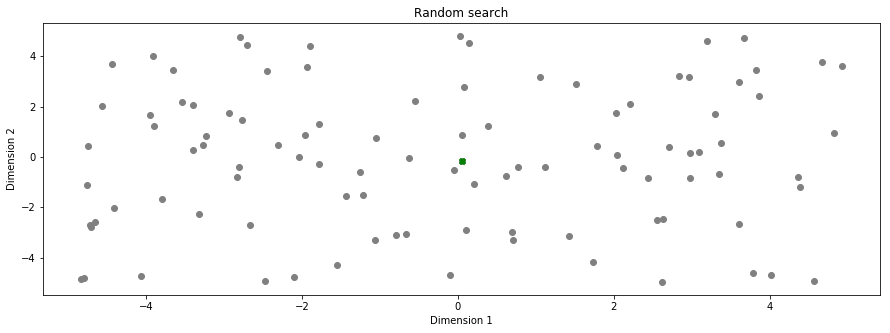


A simple scatter plot with size of point proportional to cost


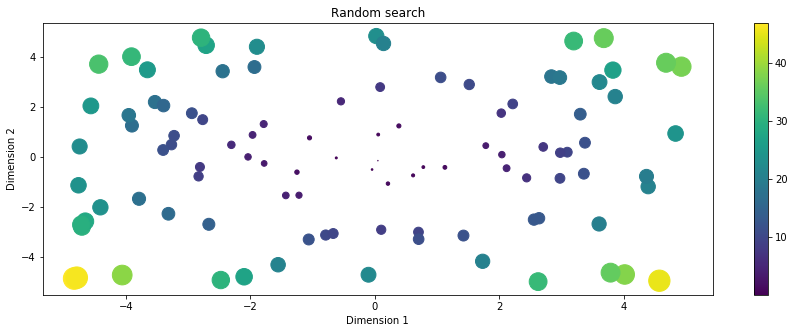


A simple scatter plot with points annotated with their cost


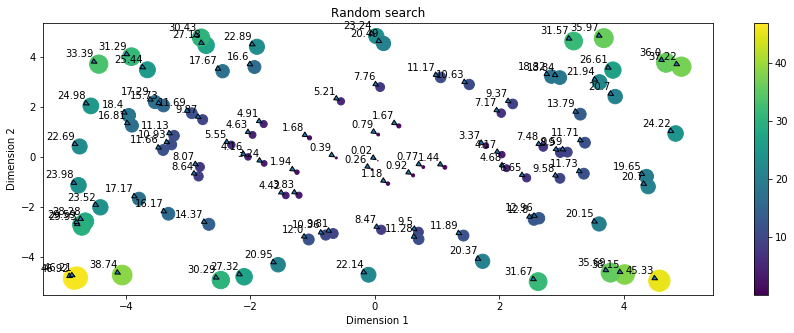


A simple scatter plot in 3d


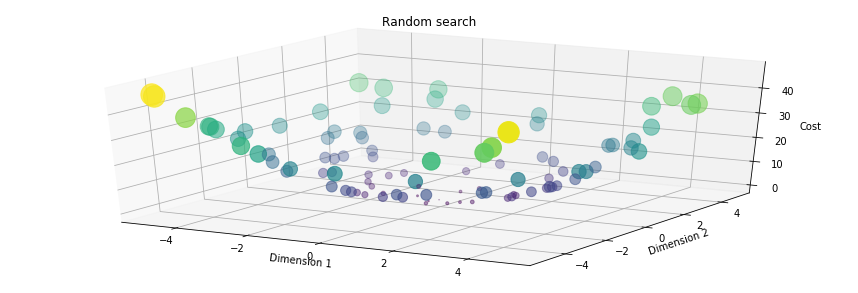

In [12]:
#%%pep8
if __name__ == '__main__':
    # problem configuration
    problem_size = 2
    search_space = [[-5, +5] for i in range(problem_size)]
    print('Search space for the algorithm:{}'.format(search_space))
    # algorithm configuration
    max_iter = 100
    # execute the algorithm
    random_search = Random_search(search_space, max_iter)
    random_search.search()
    scatter_plot_of_solutions_simple(random_search.candidate_solutions,
                                     random_search.best_solution)
    scatter_plot_of_solutions_sized(random_search.candidate_solutions,
                                    random_search.best_solution)
    scatter_plot_of_solutions_annotated(random_search.candidate_solutions,
                                        random_search.best_solution)
    scatter_plot_of_solutions_3d(random_search.candidate_solutions,
                                 random_search.best_solution)